# Working with COVID data

Let's see Pandas in action with real data. In the process, we'll cover some useful functions. But the functions themselves aren't the point. 

What we really want to consider is how data manipulations can help us understand the underlying **data-generating processes**. These processes are the true point of data science: data is always a proxy for something about the world that we want to understand. That is, data is *evidence, not the object* of research.

## Data prep

Read the [awkwardly formatted data table](https://docs.google.com/spreadsheets/d/e/2PACX-1vQvvugFsb4GePXQnmEZbgrtqmJRiaA7tO1UGSBwvBdhbJEmf2ntzE0am-x-Lo6mLPj9ASLpAg6UZsCF/pubhtml?gid=1214476126&single=true) over the web. Take a look at this and discuss what you expect on import (problems, data types, dataframe length and shape, etc.).

In [1]:
import pandas as pd

# get data from TCHD's Google sheet
sheet = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQvvugFsb4GePXQnmEZbgrtqmJRiaA7tO1UGSBwvBdhbJEmf2ntzE0am-x-Lo6mLPj9ASLpAg6UZsCF/pubhtml?gid=1214476126&single=true'
fetched_data = pd.read_html(sheet, skiprows=1)
covid = fetched_data[0]

# get rid of undesired data
columns_to_retain = list(covid.columns)[1:] # discard first column
columns_to_retain.pop()                     # discard last column
covid = covid[columns_to_retain].iloc[2:]   # discard empty 0th row and bad 1st row
covid.reset_index(drop=True, inplace=True)  # reset index to begin at zero

# change some columns to integers
integer_columns = ['Total Tests', 'New Positive Cases (TCHD)', 'Total Positive Cases (TCHD)']
covid[integer_columns] = covid[integer_columns].astype(int)

# take a look at the data
covid.head()

,Date,Total Tests,Daily Tests (ECLRS),New Positive Cases (TCHD),Total Positive Cases (TCHD),Released from Isolation (TCHD),Active Cases (TCHD),Active COVID-19 Hospitalizations (CHS),Total TC Resident Deaths (TCHD),Total Non- Resident Deaths (TCHD)
0,3/15/20,46,NaN,0,1,NaN,NaN,NaN,NaN,NaN
1,3/16/20,51,NaN,1,2,NaN,NaN,NaN,NaN,NaN
2,3/17/20,107,NaN,1,3,NaN,NaN,NaN,NaN,NaN
3,3/18/20,145,NaN,3,6,NaN,NaN,NaN,NaN,NaN
4,3/19/20,279,NaN,0,6,NaN,NaN,NaN,NaN,NaN


In [2]:
# How much data?
covid.shape

(345, 10)

In [3]:
# Write out covid data for offline use
#covid.to_csv('02-22-covid_data_tchd.csv', index=False)

In [4]:
# Read in saved data if online fetch fails
#covid = pd.read_csv('02-22-covid_data_tchd.csv')

### Plot

In [5]:
import matplotlib.pyplot as plt

# set up inline plotting; not needed in jupyter lab
%matplotlib inline

# set default figure size
plt.rcParams['figure.figsize'] = (12.0, 8.0)

# set default figure style
plt.style.use('seaborn-poster')

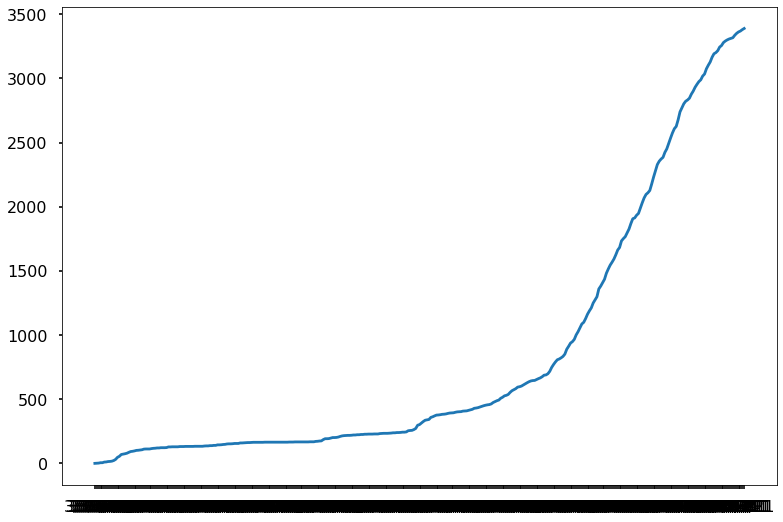

In [6]:
# plot x series, y series
plt.plot(covid['Date'], covid['Total Positive Cases (TCHD)'] )
plt.show()

Well, that's nice, but it's kinda hard to read ...

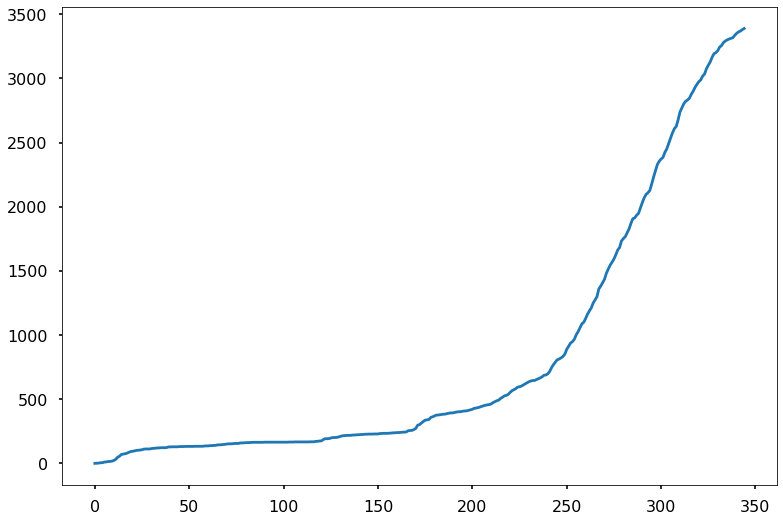

In [7]:
# Plot directly from Pandas
covid['Total Positive Cases (TCHD)'].plot(); # semicolon supresses display of return value

Better, maybe, I guess? But what does the x axis mean here?

In [8]:
# Treat the date column more elegantly
#  by converting to type datetime
covid['Date'] = pd.to_datetime(covid['Date'])
covid.head()

,Date,Total Tests,Daily Tests (ECLRS),New Positive Cases (TCHD),Total Positive Cases (TCHD),Released from Isolation (TCHD),Active Cases (TCHD),Active COVID-19 Hospitalizations (CHS),Total TC Resident Deaths (TCHD),Total Non- Resident Deaths (TCHD)
0,2020-03-15,46,NaN,0,1,NaN,NaN,NaN,NaN,NaN
1,2020-03-16,51,NaN,1,2,NaN,NaN,NaN,NaN,NaN
2,2020-03-17,107,NaN,1,3,NaN,NaN,NaN,NaN,NaN
3,2020-03-18,145,NaN,3,6,NaN,NaN,NaN,NaN,NaN
4,2020-03-19,279,NaN,0,6,NaN,NaN,NaN,NaN,NaN


In [9]:
covid.dtypes

Date                                      datetime64[ns]
Total Tests                                        int64
Daily Tests (ECLRS)                              float64
New Positive Cases (TCHD)                          int64
Total Positive Cases (TCHD)                        int64
Released from Isolation (TCHD)                   float64
Active Cases (TCHD)                              float64
Active COVID-19 Hospitalizations (CHS)           float64
Total TC Resident Deaths (TCHD)                  float64
Total Non- Resident Deaths (TCHD)                float64
dtype: object

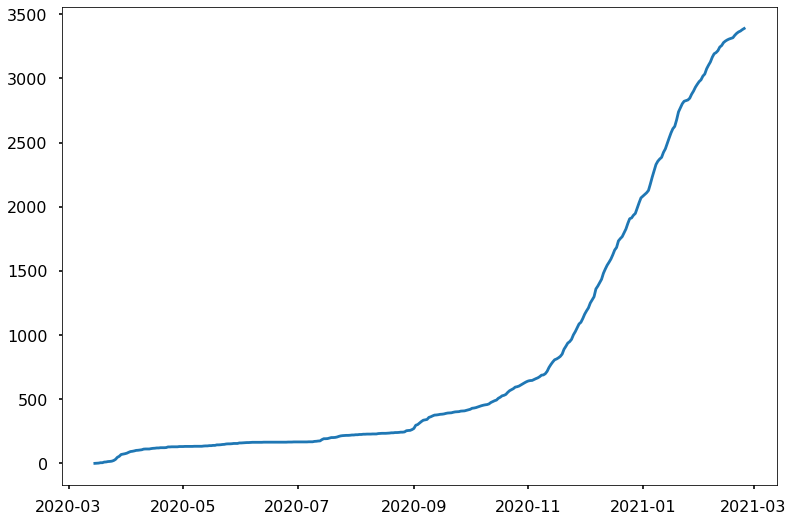

In [10]:
plt.plot(covid['Date'], covid['Total Positive Cases (TCHD)'])
plt.show()

Note the nicer formatting on the x axis. This is because Pandas understands the `datetime` type and can make smarter decisions about what to display.

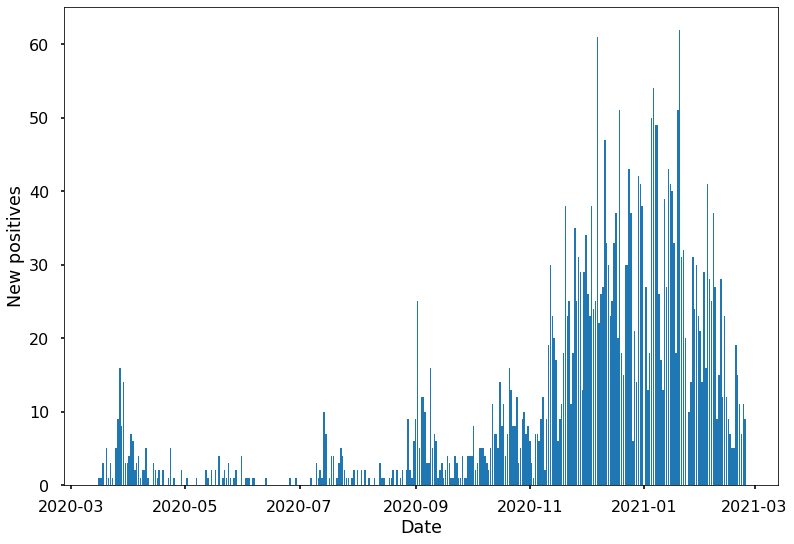

In [11]:
# plot NEW positives
plt.bar(covid['Date'], covid['New Positive Cases (TCHD)'])
plt.xlabel('Date')
plt.ylabel('New positives')
plt.show()

### Compare US data from the New York Times

See their [interactive Covid tracker](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).

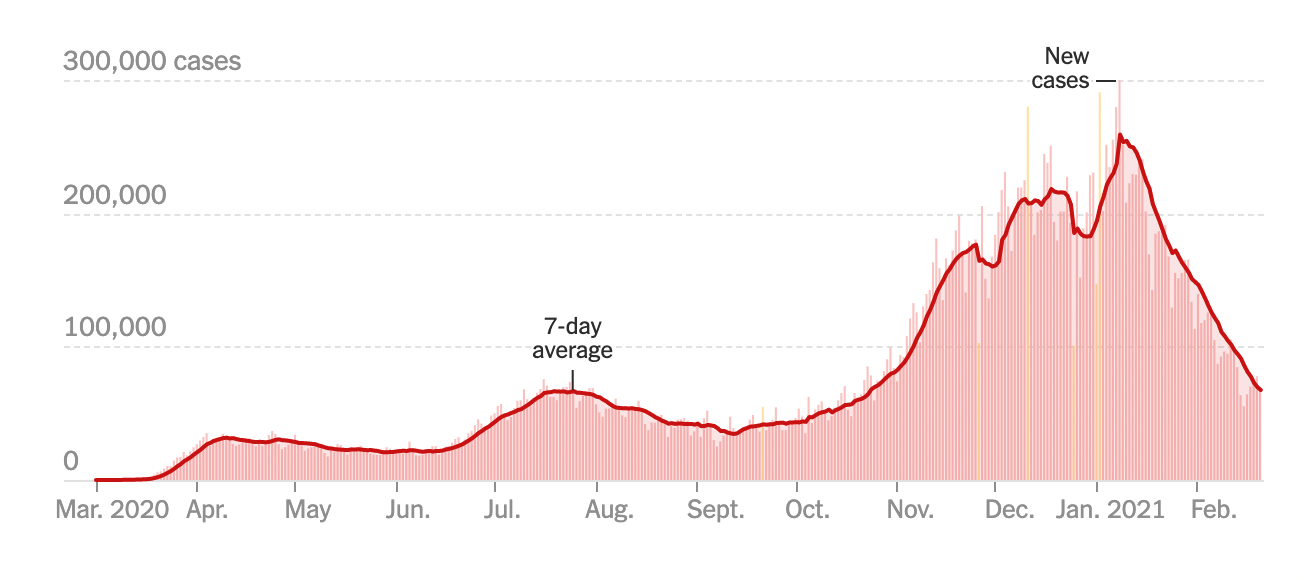

In [12]:
from IPython.display import Image
Image(filename='02-22-covid_nyt.png')

In [13]:
# Grab NYT data
nyt = pd.read_csv(
    'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv',
    parse_dates=['date']
)
nyt.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [14]:
# write out to csv
#nyt.to_csv('02-22-covid_data_us.csv', index=False)

In [15]:
# read from csv
#nyt = pd.read_csv('02-22-covid_data_us.csv', parse_dates=['date'])

In [16]:
nyt.dtypes

date      datetime64[ns]
cases              int64
deaths             int64
dtype: object

In [17]:
# calculate NEW positives per day
nyt['new_positives'] = nyt['cases'] - nyt['cases'].shift(1)
nyt.head(10)

,date,cases,deaths,new_positives
0,2020-01-21,1,0,NaN
1,2020-01-22,1,0,0.0
2,2020-01-23,1,0,0.0
3,2020-01-24,2,0,1.0
4,2020-01-25,3,0,1.0
5,2020-01-26,5,0,2.0
6,2020-01-27,5,0,0.0
7,2020-01-28,5,0,0.0
8,2020-01-29,5,0,0.0
9,2020-01-30,6,0,1.0


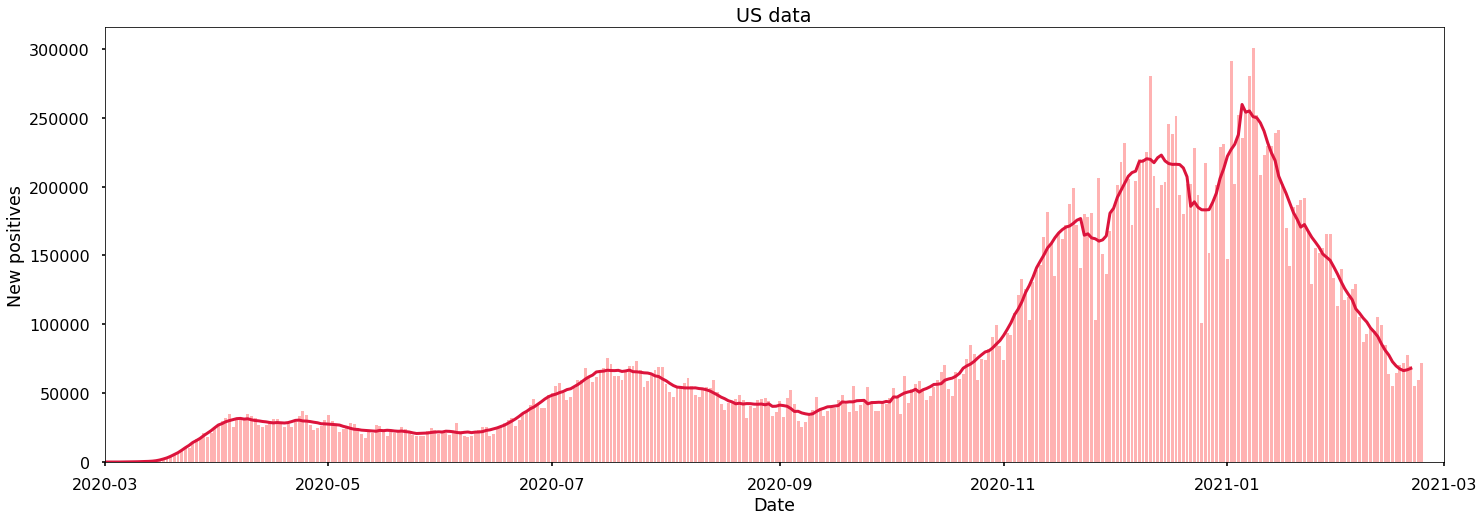

In [18]:
# Rough reproduction of NYT figure
plt.figure(figsize=(24,8))
plt.bar(nyt['date'], nyt['new_positives'], color='red', alpha=0.3)
plt.plot(nyt['date'], nyt['new_positives'].rolling(7, center=True).mean(), color='crimson', linewidth=3)
plt.xlim(('2020-03-01','2021-03-01'))
plt.xlabel('Date')
plt.ylabel('New positives')
plt.title('US data')
plt.show()

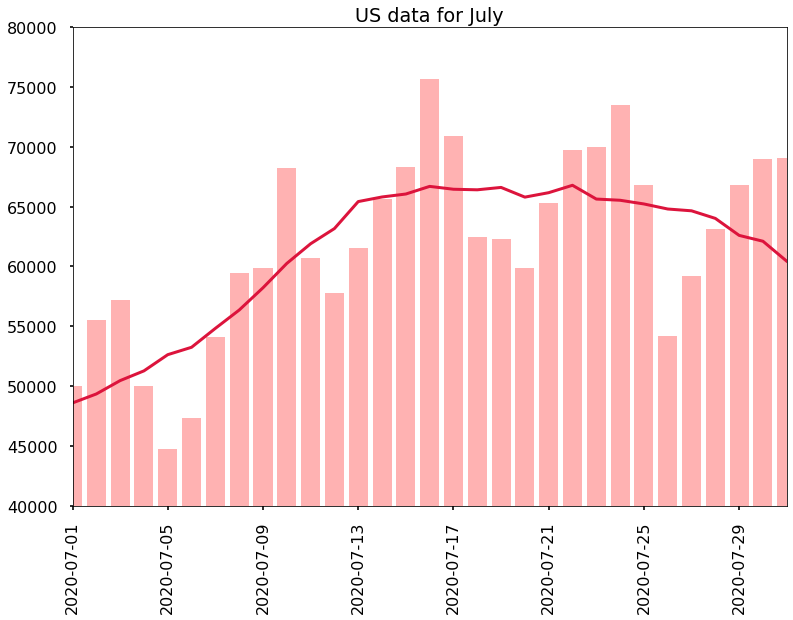

In [19]:
# computer, enhance!
#  limit display to july 2020
plt.bar(nyt['date'], nyt['new_positives'], color='red', alpha=0.3)
plt.plot(nyt['date'], nyt['new_positives'].rolling(7, center=True).mean(), color='crimson', linewidth=3)
plt.xlim(('2020-07-01','2020-07-31'))
plt.ylim((40000,80000))
plt.title('US data for July')
plt.xticks(rotation=90)
plt.show()

Notice the recurring peaks and valleys in the NYT data. What's going on here? Do we see the same thing in the TCHD data? Let's investigate ...

### Time series

Time series are useful for more than just pretty plot labeling. They can help us look into patterns in the data.

In [20]:
# datetime type
covid.loc[1,'Date']

Timestamp('2020-03-16 00:00:00')

In [21]:
# use a datetime function
covid.loc[1,'Date'].day_name()

'Monday'

In [22]:
# another datetime function, now as a day number
covid['Date'].dt.weekday.head()

0    6
1    0
2    1
3    2
4    3
Name: Date, dtype: int64

Weekday numbering: Monday=0, Sunday=6.

In [23]:
# Plot only Monday data
monday_selector = covid['Date'].dt.day_name() == 'Monday'
covid_mondays = covid.loc[monday_selector, ['Date', 'New Positive Cases (TCHD)']]

In [24]:
# What does the selector do?
print("Monday selector head")
display(monday_selector.head())

# How many Mondays in our data?
print("\nMonday data shape:", covid_mondays.shape)

Monday selector head


0    False
1     True
2    False
3    False
4    False
Name: Date, dtype: bool


Monday data shape: (50, 2)


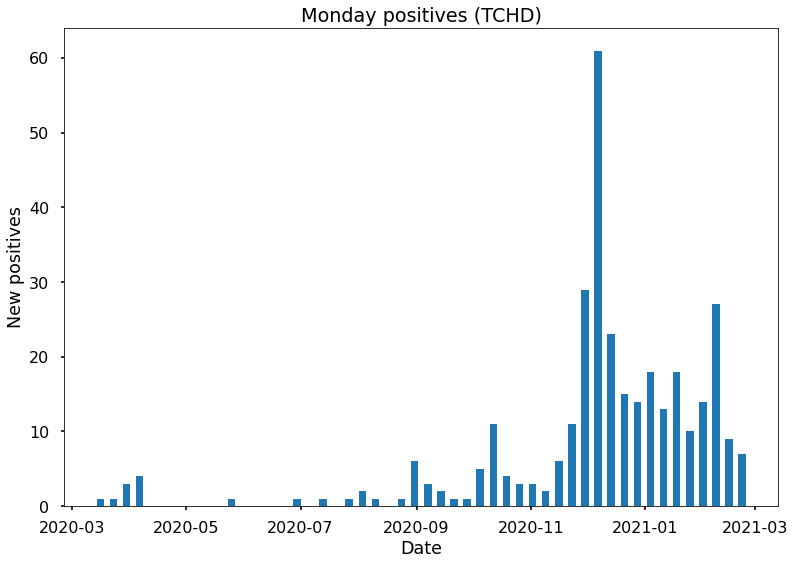

In [25]:
# plot monday cases
plt.bar(
    covid_mondays['Date'], 
    covid_mondays['New Positive Cases (TCHD)'],
    width = 4
)
plt.xlabel('Date')
plt.ylabel('New positives')
plt.title('Monday positives (TCHD)')
plt.show()

## Grouping

In [26]:
# save weekday as a new column
covid['weekday'] = covid['Date'].dt.weekday
covid.head()

,Date,Total Tests,Daily Tests (ECLRS),New Positive Cases (TCHD),Total Positive Cases (TCHD),Released from Isolation (TCHD),Active Cases (TCHD),Active COVID-19 Hospitalizations (CHS),Total TC Resident Deaths (TCHD),Total Non- Resident Deaths (TCHD),weekday
0,2020-03-15,46,NaN,0,1,NaN,NaN,NaN,NaN,NaN,6
1,2020-03-16,51,NaN,1,2,NaN,NaN,NaN,NaN,NaN,0
2,2020-03-17,107,NaN,1,3,NaN,NaN,NaN,NaN,NaN,1
3,2020-03-18,145,NaN,3,6,NaN,NaN,NaN,NaN,NaN,2
4,2020-03-19,279,NaN,0,6,NaN,NaN,NaN,NaN,NaN,3


In [27]:
# the .groupby() method
grouped = covid.groupby(['weekday'])

# calculate means by group
grouped['New Positive Cases (TCHD)'].mean()

weekday
0     6.660000
1     9.540000
2    11.380000
3    11.448980
4    11.937500
5     9.755102
6     8.061224
Name: New Positive Cases (TCHD), dtype: float64

In [28]:
# what *is* a grouped object?
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [29]:
# iterate over groups
for name, group in grouped:
    print("Weekday:", name)
    display(group['New Positive Cases (TCHD)'].head(5))
    break # break out of loop after first iteration (for brevity)

Weekday: 0


1     1
8     1
15    3
22    4
29    0
Name: New Positive Cases (TCHD), dtype: int64

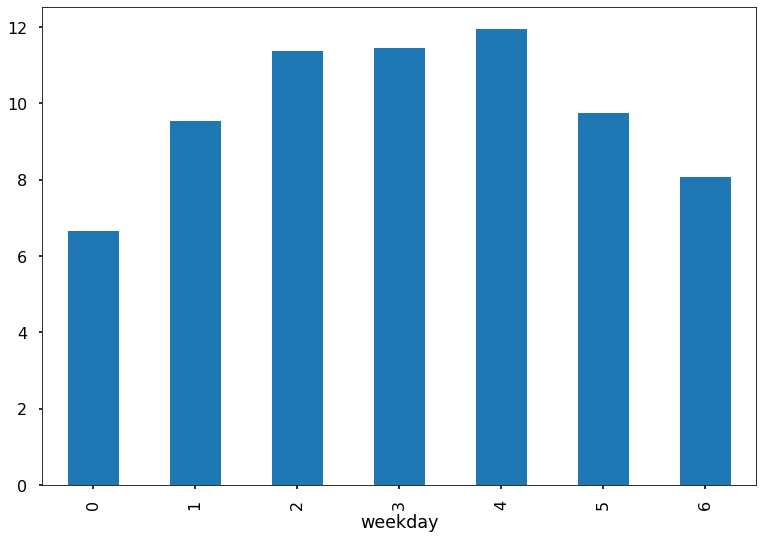

In [30]:
grouped['New Positive Cases (TCHD)'].mean().plot(kind='bar');

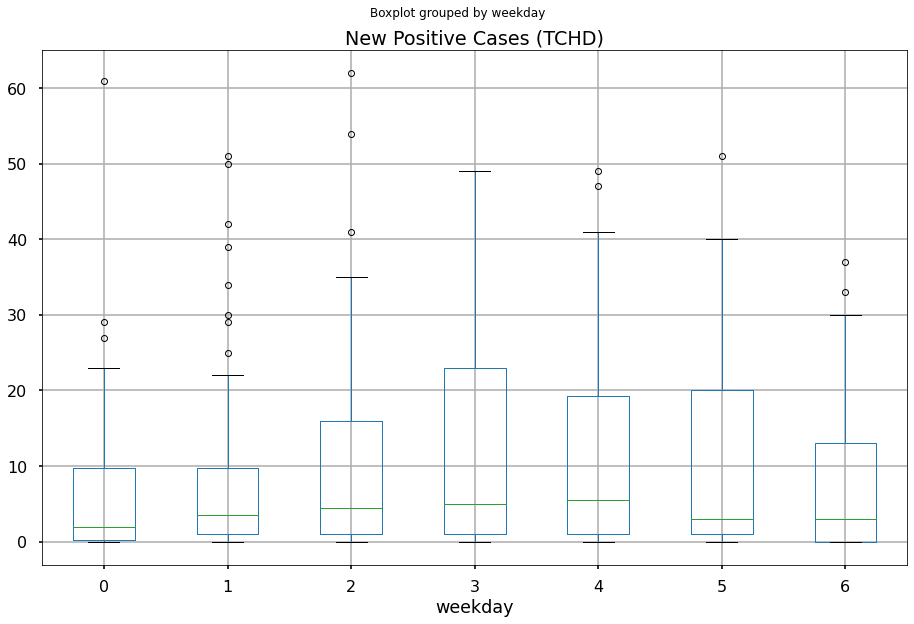

In [31]:
covid.boxplot('New Positive Cases (TCHD)', by='weekday')
plt.tight_layout()

Box shows the range between first and third quartile, marking the median. Whiskers extend (by default) to the last data point that falls within 1.5 times the interquartile range beyond the box. Outliers are plotted individually.

### Rolling average

By how much does each weekday deviate from the weekly average?

In [32]:
positives = "New Positive Cases (TCHD)" # save string for convenience

In [33]:
covid[[positives]].head(10)

,New Positive Cases (TCHD)
0,0
1,1
2,1
3,3
4,0
5,5
6,1
7,3
8,1
9,0


In [34]:
# work with a rolling window
rolling_positives = covid[positives].rolling(7, center=True).mean() # first use of .rolling()
rolling_positives.head(10)

0         NaN
1         NaN
2         NaN
3    1.571429
4    2.000000
5    2.000000
6    1.857143
7    2.142857
8    3.428571
9    5.000000
Name: New Positive Cases (TCHD), dtype: float64

In [35]:
# check that this matches a hand calculation
week_sum_around_day_4 = covid.loc[1:7,positives].sum()
print("New positives this week: ", week_sum_around_day_4)
print("Daily mean new positives:", round(week_sum_around_day_4/7, 2))
print("Daily mean new positives: {:.1f}".format(week_sum_around_day_4/7))

New positives this week:  14
Daily mean new positives: 2.0
Daily mean new positives: 2.0


See the [documentation for string formatting](https://docs.python.org/3/library/string.html#format-examples). It's a whole thing.

In [36]:
covid['deviation'] = covid[positives]/rolling_positives
covid.head()

,Date,Total Tests,Daily Tests (ECLRS),New Positive Cases (TCHD),Total Positive Cases (TCHD),Released from Isolation (TCHD),Active Cases (TCHD),Active COVID-19 Hospitalizations (CHS),Total TC Resident Deaths (TCHD),Total Non- Resident Deaths (TCHD),weekday,deviation
0,2020-03-15,46,NaN,0,1,NaN,NaN,NaN,NaN,NaN,6,NaN
1,2020-03-16,51,NaN,1,2,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2020-03-17,107,NaN,1,3,NaN,NaN,NaN,NaN,NaN,1,NaN
3,2020-03-18,145,NaN,3,6,NaN,NaN,NaN,NaN,NaN,2,1.909091
4,2020-03-19,279,NaN,0,6,NaN,NaN,NaN,NaN,NaN,3,0.000000


Why calculate `deviation` as a ratio, rather than an absolute difference? What are the advantages of each method?

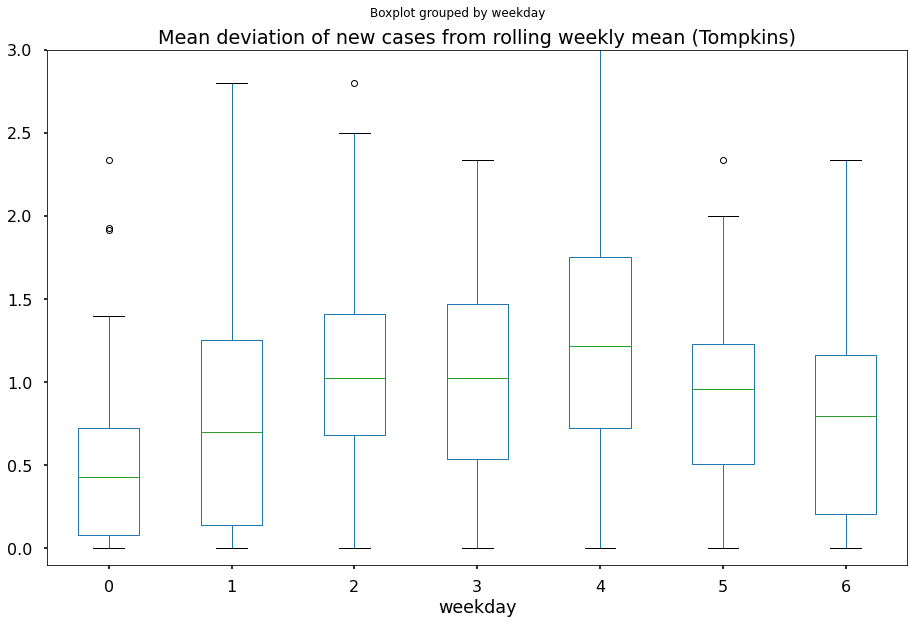

In [37]:
# plot mean deviation from rolling weekly mean

covid.boxplot(
    'deviation', 
    by='weekday', 
    grid=False
)
plt.title("Mean deviation of new cases from rolling weekly mean (Tompkins)")
plt.ylim([-0.1,3]) # zoom in to see better the main features
plt.tight_layout() # often fixes layout bugs and removes excess whitespace
plt.savefig('02-22-covid-deviations-tc.png', dpi=300)

### Compare national data

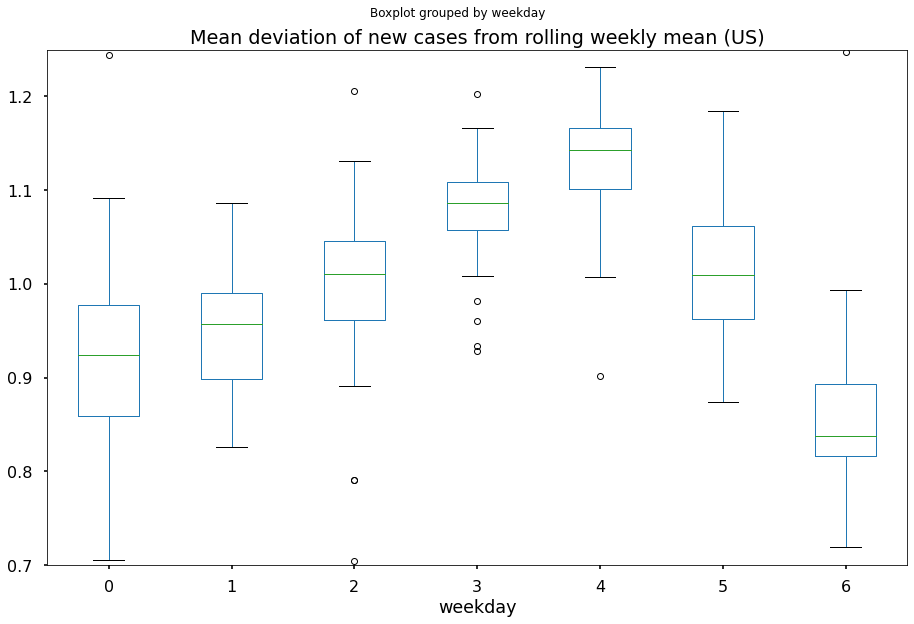

In [38]:
# calculate deviations
nyt['deviation'] = nyt['new_positives']/nyt['new_positives'].rolling(7, center=True).mean()
nyt['weekday'] = nyt['date'].dt.weekday

# create figure
nyt.boxplot(
    'deviation', 
    by='weekday', 
    grid=False
)
plt.title("Mean deviation of new cases from rolling weekly mean (US)")
plt.ylim([0.7,1.25]) # zoom in to see better the main features
plt.tight_layout() # often fixes layout bugs and removes excess whitespace
plt.savefig('02-22-covid-deviations-us.png', dpi=300)

What's different between TCHD data and US data? How might we explain the difference(s)?